<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/blob/main/MMAI869_Pump_It_Up_Model_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MMAI 869, Smith School of Business at Queens University
###Team Broadview Project, Pump it Up: Data Mining the Water Table

#Install and ImportRequired Libraries

In [928]:
# pip install feature_engine

In [929]:
# pip install category_encoders

In [930]:
# pip install feature_engine

###Import Libraries

In [931]:
import numpy as np  
import pandas as pd  
import datetime as dt

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report


from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.utils import compute_class_weight
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

from feature_engine.encoding import RareLabelEncoder

from category_encoders import OneHotEncoder, TargetEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


https://medium.com/analytics-vidhya/predictive-modeling-for-tanzanian-water-pumps-701bcc7760b2

https://towardsdatascience.com/predicting-the-functional-status-of-pumps-in-tanzania-355c9269d0c2

https://rstudio-pubs-static.s3.amazonaws.com/339668_006f4906390e41cea23b3b786cc0230a.html

https://itnext.io/predicting-functional-water-pumps-in-tanzania-using-random-forests-and-logistic-regression-in-ffa04b0617f2

https://towardsdatascience.com/pump-it-up-with-catboost-828bf9eaac68

### Check Allocated System Specs by Google Colab

In [932]:
from psutil import *

cpu_count()

2

In [933]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [934]:
!df -h / |awk '{print $4}'

Avail
85G


In [935]:
!free -h  --si | awk '/Mem:/{print $2}'

13G


In [936]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [937]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



#1. Loading the dataset from GitHub: [MMAI869-Pump-it-Up-Competition]

  Data is accessed from github: (https://github.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition)



In [938]:
train_ulr = 'https://raw.githubusercontent.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/main/preprocessed_data.csv'
test_ulr = 'https://raw.githubusercontent.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/main/preprocessed_test.csv'
tt_ulr = 'https://raw.githubusercontent.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/main/clean.csv'
# ulr_Test_Set_Values = 'https://raw.githubusercontent.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/main/Test_Set_Values.csv'
train = pd.read_csv(train_ulr)
test = pd.read_csv(test_ulr)
train2 = pd.read_csv(tt_ulr)
# test = pd.read_csv(ulr_Test_Set_Values)
# data = Training_Set_Values.merge(Training_Set_Labels, on='id', how='right')

pd.set_option('display.max_columns', None)

In [939]:
test_id = test.id

In [940]:
train.head()

,id,amount_tsh,funder,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,year_recorded,month_recorded,day_recorded,quarer_recorded,percipitation_class,well_age
0,69572,6000.0,Roman,1390.000000,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109.0,Yes,VWC,No,1999.0,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional,2011,3,0,1,4,12.0
1,8776,200.0,Grumeti,1399.000000,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280.0,Missing,Other,Yes,2010.0,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2013,3,2,1,4,3.0
2,34310,25.0,Lottery Club,686.000000,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250.0,Yes,VWC,Yes,2009.0,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,functional,2013,2,0,1,2,4.0
3,67743,50.0,Unicef,263.000000,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58.0,Yes,VWC,Yes,1986.0,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,2013,1,0,1,4,27.0
4,19728,250.0,Action In A,1057.545585,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,200.0,Yes,Missing,Yes,2003.0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2011,7,2,3,0,8.0


#2- Feature Engineering
Rare values are categories within a categorical variable that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare.

* Grouping categories into rare for variables that show low cardinality may or may not improve model performance, however, we tend to re-group them into a new category to smooth model deployment.

* Grouping categories into rare for variables with high cardinality, tends to improve model performance as well.

https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-06-Categorical-Encoding/06.10-Engineering-Rare-Categories.ipynb



##2.1- Rare Value Encoding for Categorical Features
features like 'funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name' have so many values as 1, 2, 3 etc. We will train another encoder for them.

We will run the model with and without this encoding to see how much difference it makes. It will reduce the amount of data available to the model.

https://feature-engine.readthedocs.io/en/0.6.x_a/encoders/RareLabelCategoricalEncoder.html

In [941]:
train.select_dtypes(include='object').columns

Index(['funder', 'basin', 'region', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group'],
      dtype='object')

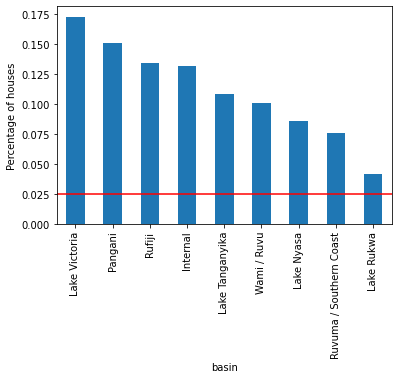

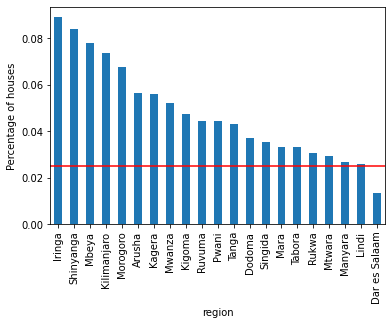

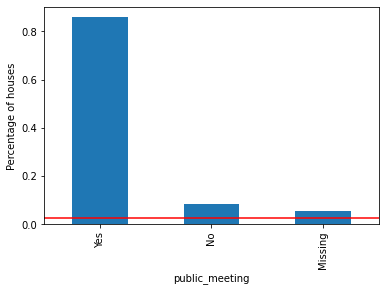

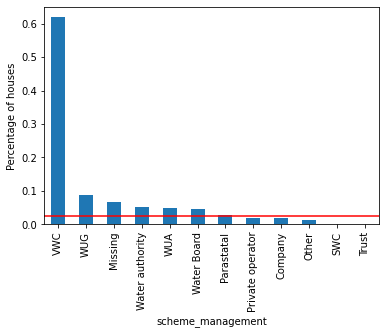

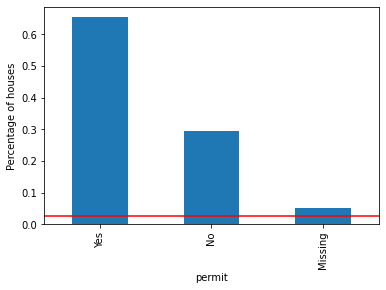

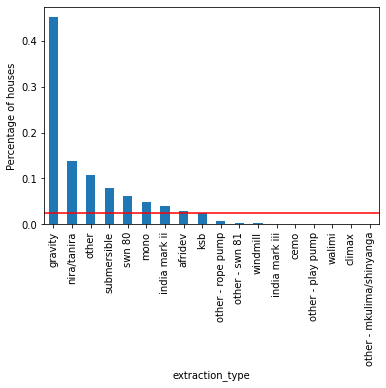

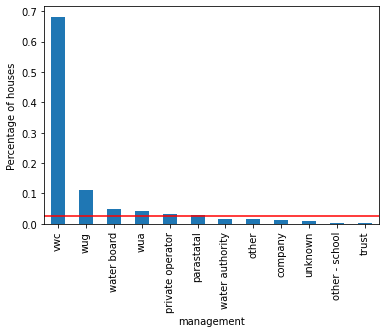

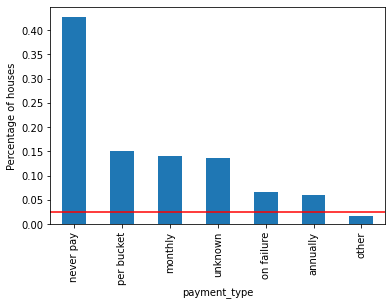

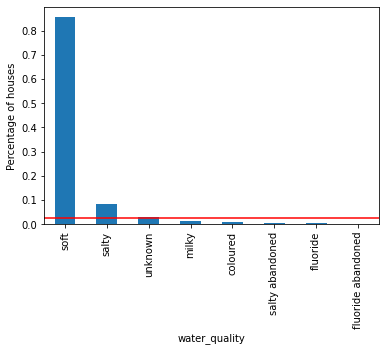

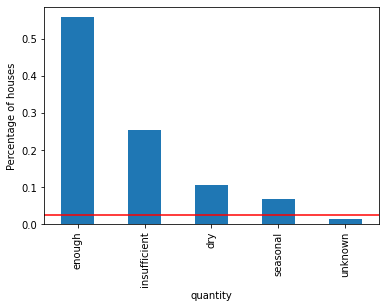

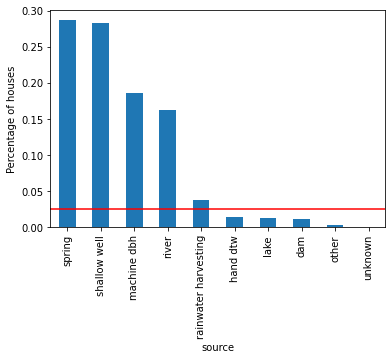

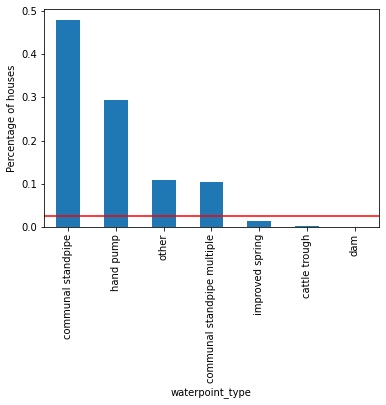

In [942]:
for col in ['basin', 'region', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type'
            ]:

    temp_df = pd.Series(train[col].value_counts() / len(train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 2.5 % to flag the threshold for rare categories
    fig.axhline(y=0.025, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [943]:
#Chose the ones that have categories below the 2.5% line.
rare_encoder = RareLabelEncoder(
    tol=0.025,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['scheme_management', 'extraction_type', 'management',
        'water_quality', 'source','waterpoint_type'], # variables to re-group
    replace_with='Rare'
)  

In [944]:
rare_encoder_EXtreme_Cardinality = RareLabelEncoder(
    tol=0.007,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    max_n_categories = 75,
    variables=['lga', 'funder'], # variables to re-group
    replace_with='Rare'
)  

In [945]:
rare_encoder_ExCard_ward = RareLabelEncoder(
    tol=0.002,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    max_n_categories = 500,
    variables=['ward'], # variables to re-group
    replace_with='Rare'
)

###2.1.1- Fit the the Rare Encoders to data  

In [946]:
rare_encoder.fit(train)

RareLabelEncoder(n_categories=4, tol=0.025,
                 variables=['scheme_management', 'extraction_type',
                            'management', 'water_quality', 'source',
                            'waterpoint_type'])

In [947]:
rare_encoder_EXtreme_Cardinality.fit(train)

RareLabelEncoder(max_n_categories=75, n_categories=4, tol=0.007,
                 variables=['lga', 'funder'])

In [948]:
rare_encoder_ExCard_ward.fit(train)

RareLabelEncoder(max_n_categories=500, n_categories=4, tol=0.002,
                 variables=['ward'])

###2.2.2- Transform Data with Encoder

In [949]:
rare_enc_train = rare_encoder.transform(train)
# test = rare_encoder.transform(test)

In [950]:
rare_enc_train = rare_encoder_EXtreme_Cardinality.transform(rare_enc_train)
# test = rare_encoder_EXtreme_Cardinality.transform(test)

In [951]:
rare_enc_train = rare_encoder_ExCard_ward.transform(rare_enc_train)
# test = rare_encoder_ExCard_ward.transform(test)

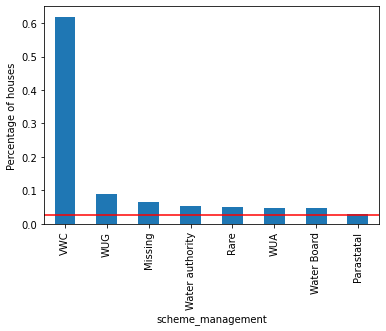

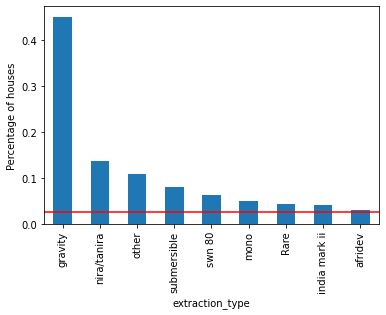

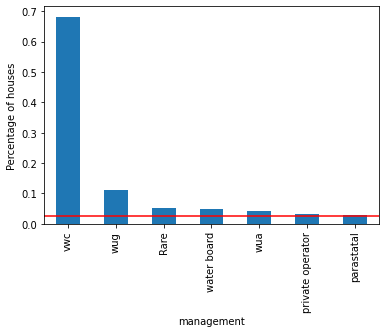

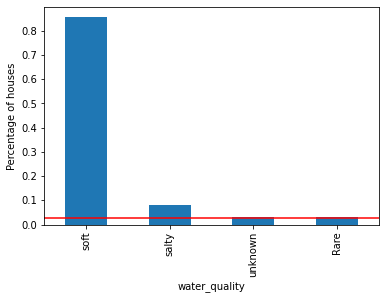

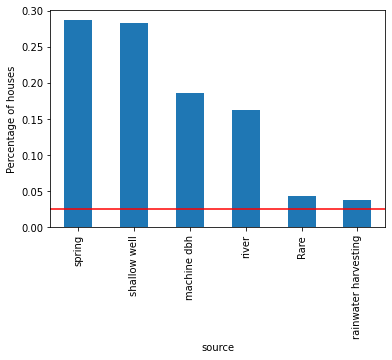

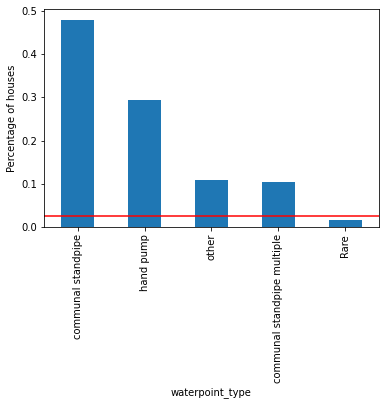

In [952]:
for col in ['scheme_management', 'extraction_type', 'management',
        'water_quality', 'source','waterpoint_type']:

    temp_df = pd.Series(rare_enc_train[col].value_counts() / len(rare_enc_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 2.5 % to flag the threshold for rare categories
    fig.axhline(y=0.025, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

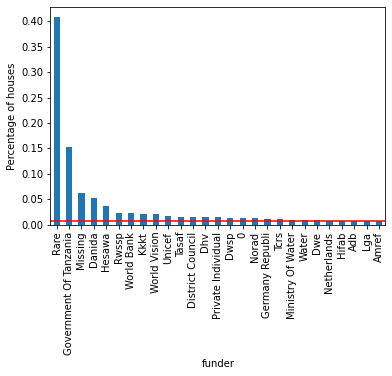

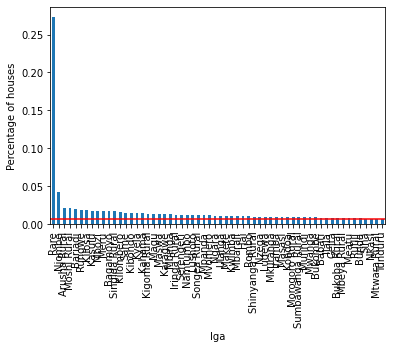

In [953]:
for col in ['funder', 'lga']:

    temp_df = pd.Series(rare_enc_train[col].value_counts() / len(rare_enc_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.007, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

In [954]:
# check for cardinality in categorical variables

for var in ['funder', 'basin', 'region', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type']:
    
    print(var, ' contains ', len(rare_enc_train[var].unique()), ' labels')


funder  contains  27  labels
basin  contains  9  labels
region  contains  21  labels
lga  contains  60  labels
ward  contains  33  labels
public_meeting  contains  3  labels
scheme_management  contains  8  labels
permit  contains  3  labels
extraction_type  contains  9  labels
management  contains  7  labels
payment_type  contains  7  labels
water_quality  contains  4  labels
quantity  contains  5  labels
source  contains  6  labels
waterpoint_type  contains  5  labels


# Label Distribution and Label Encoding
Multiclass Classification Labels, need to encode them

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Text(0, 0.5, 'Number of Occurance')

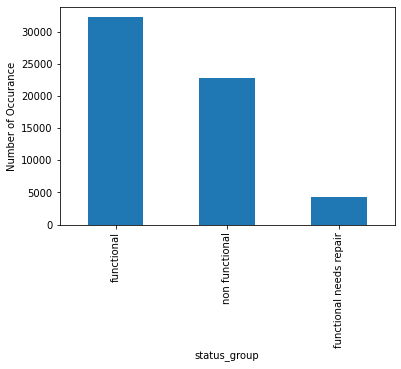

In [955]:
train.status_group.value_counts().plot.bar()
plt.xlabel('status_group')
plt.ylabel('Number of Occurance')

In [956]:
train.status_group.value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [957]:
train.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [958]:
label_encouder=LabelEncoder()
train.status_group = label_encouder.fit_transform(train.status_group)
train.status_group.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int64

Text(0, 0.5, 'Number of Occurance')

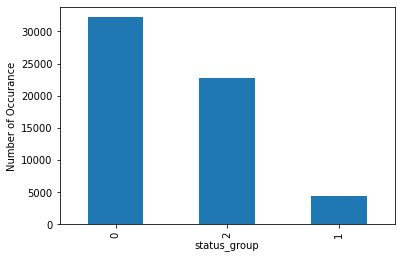

In [959]:
train.status_group.value_counts().plot.bar()
plt.xlabel('status_group')
plt.ylabel('Number of Occurance')

In [960]:
# data.info()

In [961]:
# f, ax = plt.subplots(figsize=(30, 24))
# plt.scatter(x=train.longitude, y=train.latitude, c= train.status_group)
# plt.show()

#3- Encoding Categorical Features to Numeric

##3.1- Encoding categorical Features with factorize
pandas.factorize() method helps to get the numeric representation of an array by identifying distinct values

**Output: fac_train and fac_test**

In [962]:
train.head()

,id,amount_tsh,funder,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,year_recorded,month_recorded,day_recorded,quarer_recorded,percipitation_class,well_age
0,69572,6000.0,Roman,1390.000000,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109.0,Yes,VWC,No,1999.0,gravity,vwc,annually,soft,enough,spring,communal standpipe,0,2011,3,0,1,4,12.0
1,8776,200.0,Grumeti,1399.000000,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280.0,Missing,Other,Yes,2010.0,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013,3,2,1,4,3.0
2,34310,25.0,Lottery Club,686.000000,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250.0,Yes,VWC,Yes,2009.0,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,0,2013,2,0,1,2,4.0
3,67743,50.0,Unicef,263.000000,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58.0,Yes,VWC,Yes,1986.0,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013,1,0,1,4,27.0
4,19728,250.0,Action In A,1057.545585,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,200.0,Yes,Missing,Yes,2003.0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011,7,2,3,0,8.0


In [963]:
fac_train=train.copy()
fac_test=test.copy()

In [964]:
fac_train['train']=1
fac_test['train']=0
fac_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59400 non-null  int64  
 1   amount_tsh           59400 non-null  float64
 2   funder               59400 non-null  object 
 3   gps_height           59400 non-null  float64
 4   longitude            59400 non-null  float64
 5   latitude             59400 non-null  float64
 6   basin                59400 non-null  object 
 7   region               59400 non-null  object 
 8   district_code        59400 non-null  int64  
 9   lga                  59400 non-null  object 
 10  ward                 59400 non-null  object 
 11  population           59400 non-null  float64
 12  public_meeting       59400 non-null  object 
 13  scheme_management    59400 non-null  object 
 14  permit               59400 non-null  object 
 15  construction_year    59400 non-null 

In [965]:
fac_train.shape,fac_test.shape

((59400, 31), (14850, 30))

In [966]:
target=fac_train.pop('status_group')

In [967]:
combined = pd.concat([fac_train, fac_test])

In [968]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   74250 non-null  int64  
 1   amount_tsh           74250 non-null  float64
 2   funder               74250 non-null  object 
 3   gps_height           74250 non-null  float64
 4   longitude            74250 non-null  float64
 5   latitude             74250 non-null  float64
 6   basin                74250 non-null  object 
 7   region               74250 non-null  object 
 8   district_code        74250 non-null  int64  
 9   lga                  74250 non-null  object 
 10  ward                 74250 non-null  object 
 11  population           74250 non-null  float64
 12  public_meeting       74250 non-null  object 
 13  scheme_management    74250 non-null  object 
 14  permit               74250 non-null  object 
 15  construction_year    74250 non-null 

In [969]:
fac_train.select_dtypes(include='object').columns

Index(['funder', 'basin', 'region', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

In [970]:
combined['funder'] = pd.factorize(combined['funder'])[0]
combined['scheme_management'] = pd.factorize(combined['scheme_management'])[0]
combined['extraction_type'] = pd.factorize(combined['extraction_type'])[0]
combined['management'] = pd.factorize(combined['management'])[0]
combined['payment_type'] = pd.factorize(combined['payment_type'])[0]
combined['water_quality'] = pd.factorize(combined['water_quality'])[0]
combined['quantity'] = pd.factorize(combined['quantity'])[0]
combined['source'] = pd.factorize(combined['source'])[0]
combined['waterpoint_type'] = pd.factorize(combined['waterpoint_type'])[0]
combined['basin'] = pd.factorize(combined['basin'])[0]
combined['region'] = pd.factorize(combined['region'])[0]
combined['lga'] = pd.factorize(combined['lga'])[0]
# combined['district_code'] = pd.factorize(combined['district_code'])[0]
combined['well_age'] = pd.factorize(combined['well_age'])[0]
combined['ward'] = pd.factorize(combined['ward'])[0]
combined['permit'] = pd.factorize(combined['permit'])[0]
combined['public_meeting'] = pd.factorize(combined['public_meeting'])[0]


combined.lga.head(5)

0    0
1    1
2    2
3    3
4    4
Name: lga, dtype: int64

In [971]:
fac_train = combined[combined["train"] == 1]
fac_test = combined[combined["train"] == 0]
fac_train.drop(["train"], axis=1, inplace=True)
fac_train.drop(['id'],axis=1, inplace=True)

fac_test.drop(["train"], axis=1, inplace=True)
fac_test.drop(['id'],axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##3.2- Target Value encoding

**Output: tar_train and tar_test**

https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53

https://contrib.scikit-learn.org/category_encoders/

In [972]:
train.select_dtypes(include='object').columns

Index(['funder', 'basin', 'region', 'lga', 'ward', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

In [973]:
print('funder has', len(train.funder.value_counts()),'categories and ward has', len(train.ward.value_counts()))

funder has 1898 categories and ward has 2092


In [1002]:
tar_train=train.copy()
tar_test=test.copy()

In [1003]:
tar_train.drop(['id'],axis=1, inplace=True)
tar_test.drop(['id'],axis=1, inplace=True)

In [1004]:
#turn out the public_meeting has zero variance with target so we will drop it

tar_train.drop(['public_meeting'],axis=1, inplace=True)
tar_test.drop(['public_meeting'],axis=1, inplace=True)

tar_train.drop(['permit'],axis=1, inplace=True)
tar_test.drop(['permit'],axis=1, inplace=True)

###3.2.1- Rare Value Encoding for Extremely Cardinal Features
If used the rare value encoding for categorical features, **DO NOT RUN** this part

In [1005]:
rare_encoder_EXtreme_Cardinality = RareLabelEncoder(
    tol=0.002,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    max_n_categories = 1000,
    variables=['funder'], # variables to re-group
    replace_with='Rare'
)  

In [1006]:
rare_encoder_ExCard_ward = RareLabelEncoder(
    tol=0.002,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    max_n_categories = 1000,
    variables=['ward'], # variables to re-group
    replace_with='Rare'
)

In [1007]:
rare_encoder_EXtreme_Cardinality.fit(tar_train)

RareLabelEncoder(max_n_categories=1000, n_categories=4, tol=0.002,
                 variables=['funder'])

In [1008]:
rare_encoder_ExCard_ward.fit(tar_train)

RareLabelEncoder(max_n_categories=1000, n_categories=4, tol=0.002,
                 variables=['ward'])

In [1009]:
tar_train = rare_encoder_EXtreme_Cardinality.transform(tar_train)
# test = rare_encoder_EXtreme_Cardinality.transform(test)

In [1010]:
tar_train = rare_encoder_ExCard_ward.transform(tar_train)
# test = rare_encoder_ExCard_ward.transform(test)

In [1011]:
# check for cardinality in categorical variables

for var in ['funder','ward']:
    
    print(var, ' contains ', len(tar_train[var].unique()), ' labels')

funder  contains  80  labels
ward  contains  33  labels


###3.2.2- Perfrming Target Encoding

In [988]:
# train.head()

In [989]:
# for var in ['funder', 'basin', 'region', 'lga', 'ward', 'public_meeting',
#        'scheme_management', 'permit', 'extraction_type', 'management',
#        'payment_type', 'water_quality', 'quantity', 'source',
#        'waterpoint_type']:
    
#     fig = plt.figure()
#     fig = tar_train.groupby([var])['status_group'].mean().plot()
#     fig.set_title('Relationship between {} and statue_group'.format(var))
#     fig.set_ylabel('Mean status_group')
#     plt.show()

In [1012]:
status_labels =['func', 'non-func' , 'func_repair']

In [1013]:
enc=OneHotEncoder().fit(tar_train.status_group.astype(str))
status_group_labels=enc.transform(tar_train.status_group.astype(str))
status_group_labels.columns = status_labels
status_group_labels.head()

,func,non-func,func_repair
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [1014]:
class_names=status_group_labels.columns[0:3]
class_names

Index(['func', 'non-func', 'func_repair'], dtype='object')

In [1015]:
variables=tar_train.select_dtypes(include='object').columns
variables

Index(['funder', 'basin', 'region', 'lga', 'ward', 'scheme_management',
       'extraction_type', 'management', 'payment_type', 'water_quality',
       'quantity', 'source', 'waterpoint_type'],
      dtype='object')

In [1016]:
enc=TargetEncoder(
    verbose=0,
    cols=None,
    drop_invariant=True,
    return_df=True,
    # handle_missing='value',
    # handle_unknown='value',
    min_samples_leaf=8,

    smoothing=10,
    )

In [1017]:
#set smoothing value to avoid over fitting

for var in variables:
  for class_ in class_names:
    # print(enc.fit_transform(data,status_group_labels[class_]))
    target_enc = enc.fit(tar_train[var],status_group_labels[class_])
    tar_train[var + '_' + class_] = enc.transform(tar_train[var])
    tar_test[var + '_' + class_] = enc.transform(tar_test[var])

In [1018]:
tar_train = tar_train.drop(variables,axis=1)
tar_test = tar_test.drop(variables,axis=1)

In [1019]:
tar_train.head()

,amount_tsh,gps_height,longitude,latitude,district_code,population,construction_year,status_group,year_recorded,month_recorded,day_recorded,quarer_recorded,percipitation_class,well_age,funder_func,funder_non-func,funder_func_repair,basin_func,basin_non-func,basin_func_repair,region_func,region_non-func,region_func_repair,lga_func,lga_non-func,lga_func_repair,ward_func,ward_non-func,ward_func_repair,scheme_management_func,scheme_management_non-func,scheme_management_func_repair,extraction_type_func,extraction_type_non-func,extraction_type_func_repair,management_func,management_non-func,management_func_repair,payment_type_func,payment_type_non-func,payment_type_func_repair,water_quality_func,water_quality_non-func,water_quality_func_repair,quantity_func,quantity_non-func,quantity_func_repair,source_func,source_non-func,source_func_repair,waterpoint_type_func,waterpoint_type_non-func,waterpoint_type_func_repair
0,6000.0,1390.000000,34.938093,-9.856322,5,109.0,1999.0,0,2011,3,0,1,4,12.0,0.821818,0.145455,0.032727,0.653687,0.297148,0.049164,0.782206,0.194560,0.023234,0.774823,0.205674,1.950355e-02,0.526244,0.399379,0.074377,0.515315,0.421249,0.063436,0.599253,0.299888,0.100859,0.504234,0.426864,0.068902,0.752334,0.179846,0.067820,0.565941,0.357236,0.076823,0.652323,0.275357,0.072320,0.622290,0.302744,0.074966,0.621485,0.299278,0.079237
1,200.0,1399.000000,34.698766,-2.147466,2,280.0,2010.0,0,2013,3,2,1,4,3.0,0.593410,0.346422,0.060168,0.497658,0.405835,0.096507,0.449975,0.519553,0.030472,0.592179,0.370112,3.770950e-02,0.526244,0.399379,0.074377,0.598435,0.372881,0.028683,0.599253,0.299888,0.100859,0.599540,0.301458,0.099002,0.448911,0.475856,0.075233,0.565941,0.357236,0.076823,0.523234,0.380924,0.095842,0.603922,0.259259,0.136819,0.621485,0.299278,0.079237
2,25.0,686.000000,37.460664,-3.821329,4,250.0,2009.0,0,2013,2,0,1,2,4.0,0.593410,0.346422,0.060168,0.600895,0.345749,0.053356,0.623500,0.315856,0.060644,0.581169,0.402597,1.623377e-02,0.526244,0.399379,0.074377,0.515315,0.421249,0.063436,0.599253,0.299888,0.100859,0.504234,0.426864,0.068902,0.677796,0.276683,0.045520,0.565941,0.357236,0.076823,0.652323,0.275357,0.072320,0.385671,0.577744,0.036585,0.366213,0.527609,0.106177
3,50.0,263.000000,38.486161,-11.155298,63,58.0,1986.0,2,2013,1,0,1,4,27.0,0.567644,0.338694,0.093661,0.371689,0.555753,0.072557,0.302890,0.624277,0.072832,0.265823,0.734177,2.223199e-08,0.526244,0.399379,0.074377,0.515315,0.421249,0.063436,0.551217,0.401134,0.047649,0.504234,0.426864,0.068902,0.448911,0.475856,0.075233,0.565941,0.357236,0.076823,0.025136,0.968940,0.005924,0.489571,0.466095,0.044334,0.366213,0.527609,0.106177
4,250.0,1057.545585,31.130847,-1.825359,1,200.0,2003.0,0,2011,7,2,3,0,8.0,0.593410,0.346422,0.060168,0.497658,0.405835,0.096507,0.520808,0.387515,0.091677,0.530480,0.411154,5.836576e-02,0.526244,0.399379,0.074377,0.483105,0.459376,0.057519,0.599253,0.299888,0.100859,0.598341,0.336493,0.065166,0.448911,0.475856,0.075233,0.565941,0.357236,0.076823,0.574074,0.323210,0.102716,0.603922,0.259259,0.136819,0.621485,0.299278,0.079237


##3.2- Ordinal Value encoding
this encoding considers an order between the categories and our data has not any order, so we will not use this approach

In [1020]:
# ordinal_encoder = OrdinalEncoder()

In [1021]:
# df_categorical_features = train.select_dtypes(include='object')
# df_categorical_features.columns

In [1022]:
# ord_train=tordinal_encoderrain
# ord_train = train.fit_transform(train)

In [1023]:
# ord_train=train
# for i in df_categorical_features.columns:
#   ord_train[i] = ordinal_encoder.fit_transform(train[i].values.reshape(-1,1))

In [1024]:
# ord_test=test
# for i in df_categorical_features.columns:
#   ord_test[i] = ordinal_encoder.fit_transform(test[i].values.reshape(-1,1))

#4.0- Multivariate missing value imputation for longitude, latitude, gps_height, population, and construction_year feature
KNN; The missing values are estimated as the average value from the closest K neighbours.

https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-05-Multivariate-Imputation/05.01-KNN-imputation.ipynb

https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-05-Multivariate-Imputation/05.02-MICE.ipynb

For imputing missing values in categorical variables, we have to encode the categorical values into numeric values as kNNImputer works only for numeric variables. 

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

In [ ]:
# test_imputer = KNNImputer(
#     n_neighbors=5, # the number of neighbours K
#     weights='distance', # the weighting factor
#     metric='nan_euclidean', # the metric to find the neighbours
#     add_indicator=False, # whether to add a missing indicator
# )

In [ ]:
# construction_year_zero_index

Need to combine test and train to use the KNN 

In [ ]:
test=test.drop('id', axis=1)

In [ ]:
whole_data = pd.concat([data,test])
KNN_imputer_data = whole_data.drop(['status_group'],axis=1)

In [ ]:
whole_data['status_group'].isnull().sum()

In [ ]:
imputer.fit(KNN_imputer_data)

In [ ]:
train_t = imputer.transform(KNN_imputer_data)
# test_t = imputer.transform(X_test)

# sklearn returns a Numpy array
# lets make a dataframe
train_t = pd.DataFrame(train_t, columns=KNN_imputer_data.columns)
# test_t = pd.DataFrame(test_t, columns=X_test.columns)

train_t.head()

In [ ]:
train_t_original = train_t.copy()

In [ ]:
print(len(whole_data), len(train_t))

In [ ]:
train_t.construction_year = train_t.construction_year.round()
train_t['well_age'] = train_t.year_recorded - train_t.construction_year

In [ ]:
train_t['water_per_person']=train_t.amount_tsh/train_t.population

In [ ]:
test = train_t[-14850:]
data = train_t[:59400]

In [ ]:
data['status_group'] = whole_data['status_group'][:59400]

In [ ]:
# ordinal_encoder = OrdinalEncoder()

In [ ]:
# target_encoder = 

In [ ]:
# df_categorical_features = data.select_dtypes(include='object')
# df_categorical_features.columns

In [ ]:
# for i in df_categorical_features.columns:
#   data[i] = ordinal_encoder.fit_transform(data[i].values.reshape(-1,1))

In [ ]:
# for i in df_categorical_features.columns:
#   test[i] = ordinal_encoder.fit_transform(test[i].values.reshape(-1,1))

Correlation Matrix

In [ ]:
# plt.figure(figsize=(10,8))
# cmap=data.corr()
# sns.heatmap(cmap)

#3- Train and Test Split 

In [372]:
# # tar_train  fac_train  tar_test  fac_test
# # we can use any of the encodings for categorical features we did, factorize or target encoding
# # fac_train does not have the target in it, for tar_train use drop


# X = fac_train
# Y = target


In [1025]:
# tar_train  fac_train  tar_test  fac_test
# we can use any of the encodings for categorical features we did, factorize or target encoding
# fac_train does not have the target in it, for tar_train use drop


X = tar_train.drop('status_group',axis=1)
Y = tar_train.status_group


In [1026]:
tar_train.head()

,amount_tsh,gps_height,longitude,latitude,district_code,population,construction_year,status_group,year_recorded,month_recorded,day_recorded,quarer_recorded,percipitation_class,well_age,funder_func,funder_non-func,funder_func_repair,basin_func,basin_non-func,basin_func_repair,region_func,region_non-func,region_func_repair,lga_func,lga_non-func,lga_func_repair,ward_func,ward_non-func,ward_func_repair,scheme_management_func,scheme_management_non-func,scheme_management_func_repair,extraction_type_func,extraction_type_non-func,extraction_type_func_repair,management_func,management_non-func,management_func_repair,payment_type_func,payment_type_non-func,payment_type_func_repair,water_quality_func,water_quality_non-func,water_quality_func_repair,quantity_func,quantity_non-func,quantity_func_repair,source_func,source_non-func,source_func_repair,waterpoint_type_func,waterpoint_type_non-func,waterpoint_type_func_repair
0,6000.0,1390.000000,34.938093,-9.856322,5,109.0,1999.0,0,2011,3,0,1,4,12.0,0.821818,0.145455,0.032727,0.653687,0.297148,0.049164,0.782206,0.194560,0.023234,0.774823,0.205674,1.950355e-02,0.526244,0.399379,0.074377,0.515315,0.421249,0.063436,0.599253,0.299888,0.100859,0.504234,0.426864,0.068902,0.752334,0.179846,0.067820,0.565941,0.357236,0.076823,0.652323,0.275357,0.072320,0.622290,0.302744,0.074966,0.621485,0.299278,0.079237
1,200.0,1399.000000,34.698766,-2.147466,2,280.0,2010.0,0,2013,3,2,1,4,3.0,0.593410,0.346422,0.060168,0.497658,0.405835,0.096507,0.449975,0.519553,0.030472,0.592179,0.370112,3.770950e-02,0.526244,0.399379,0.074377,0.598435,0.372881,0.028683,0.599253,0.299888,0.100859,0.599540,0.301458,0.099002,0.448911,0.475856,0.075233,0.565941,0.357236,0.076823,0.523234,0.380924,0.095842,0.603922,0.259259,0.136819,0.621485,0.299278,0.079237
2,25.0,686.000000,37.460664,-3.821329,4,250.0,2009.0,0,2013,2,0,1,2,4.0,0.593410,0.346422,0.060168,0.600895,0.345749,0.053356,0.623500,0.315856,0.060644,0.581169,0.402597,1.623377e-02,0.526244,0.399379,0.074377,0.515315,0.421249,0.063436,0.599253,0.299888,0.100859,0.504234,0.426864,0.068902,0.677796,0.276683,0.045520,0.565941,0.357236,0.076823,0.652323,0.275357,0.072320,0.385671,0.577744,0.036585,0.366213,0.527609,0.106177
3,50.0,263.000000,38.486161,-11.155298,63,58.0,1986.0,2,2013,1,0,1,4,27.0,0.567644,0.338694,0.093661,0.371689,0.555753,0.072557,0.302890,0.624277,0.072832,0.265823,0.734177,2.223199e-08,0.526244,0.399379,0.074377,0.515315,0.421249,0.063436,0.551217,0.401134,0.047649,0.504234,0.426864,0.068902,0.448911,0.475856,0.075233,0.565941,0.357236,0.076823,0.025136,0.968940,0.005924,0.489571,0.466095,0.044334,0.366213,0.527609,0.106177
4,250.0,1057.545585,31.130847,-1.825359,1,200.0,2003.0,0,2011,7,2,3,0,8.0,0.593410,0.346422,0.060168,0.497658,0.405835,0.096507,0.520808,0.387515,0.091677,0.530480,0.411154,5.836576e-02,0.526244,0.399379,0.074377,0.483105,0.459376,0.057519,0.599253,0.299888,0.100859,0.598341,0.336493,0.065166,0.448911,0.475856,0.075233,0.565941,0.357236,0.076823,0.574074,0.323210,0.102716,0.603922,0.259259,0.136819,0.621485,0.299278,0.079237


In [1027]:
x_train, x_valid, y_train, y_valid = train_test_split(X,Y, random_state = 17, test_size = 0.1, stratify = Y, shuffle=True)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((53460, 52), (5940, 52), (53460,), (5940,))

#4- Building Models

In [407]:
stratifiedkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

##4.2- Random Forest 

### 4.2.1- Hyper Parameter Tuning for Random Forest - sequential Approach

####4.2.1.1- Finding the optimum number of iterations, number of stumps
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    decision_stump= [50, 75, 100, 150, 200, 300, 400, 500, 600, 700]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        # models[str(i)] = XGBClassifier(n_estimators=i)

        models[str(i)] = RandomForestClassifier(
                            n_estimators = i,#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            criterion = 'gini', #{“gini”, “entropy”, “log_loss”}, default=”gini”
                            max_depth = None, # the larger the more prone to overfit, range 3-10
                            min_samples_split=2,
                            min_samples_leaf=1, 
                            max_features='sqrt', #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                            max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
                            #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                            min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
                            bootstrap = True,
                            warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                            class_weight = 'balanced',
                            max_samples = None,
                            verbose = 2,
                            n_jobs = -1,
                            random_state = 17,
                            
) 
#     returning the model
    return models

In [ ]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=17)
    # validating the model based on the accurasy score
    accuracy = cross_val_score(model, Input, Ouput, scoring='accuracy', cv=cv, n_jobs=-1)  
    # returning the accuracy score
    return accuracy

In [ ]:
# calling the build_models function
models = {}
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    accuracy = evaluate_model(model, x_train, y_train)

    # appending the accuray socres in results
    results.append(accuracy)
    names.append(name)

    # printing -Hyperparameter tuning of XGBoost
    print('---->Iterations (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.2.1.2- Finding the optimum criterion

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    criterions= ['gini', 'entropy']
        
#    using for loop to iterate though trees
    for i in criterions:
        
#         building model with specified trees
        # models[str(i)] = XGBClassifier(n_estimators=i)

        models[str(i)] = RandomForestClassifier(
                            n_estimators = 300,
                            criterion = i, #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            max_depth = None, # the larger the more prone to overfit, range 3-10
                            min_samples_split=2,
                            min_samples_leaf=1, 
                            max_features='sqrt', #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                            max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
                            #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                            min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
                            bootstrap = True,
                            warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                            class_weight = 'balanced',
                            max_samples = None,
                            verbose = 2,
                            n_jobs = -1,
                            random_state = 17,
                            
) 
#     returning the model
    return models

In [ ]:
# calling the build_models function
models = {}
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    accuracy = evaluate_model(model, x_train, y_train)

    # appending the accuray socres in results
    results.append(accuracy)
    names.append(name)

    # printing -Hyperparameter tuning of XGBoost
    print('---->Iterations (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.2.1.3- Finding the max_features

In [ ]:
x_train.info()

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    Num_features= [1, 2, 3, 4, 5, 6, 'sqrt', 'log2', 7, 8, 9, 10, None]
        
#    using for loop to iterate though trees
    for i in Num_features:
        
#         building model with specified trees
        # models[str(i)] = XGBClassifier(n_estimators=i)

        models[str(i)] = RandomForestClassifier(
                            n_estimators = 300,
                            criterion = 'entropy', 
                            max_depth = None, # the larger the more prone to overfit, range 3-10
                            min_samples_split=2,
                            min_samples_leaf=1, 
                            max_features= i, #{“sqrt”, “log2”, None}, int or float, default=”sqrt”#>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
                            #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                            min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
                            bootstrap = True,
                            warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                            class_weight = 'balanced',
                            max_samples = None,
                            verbose = 2,
                            n_jobs = -1,
                            random_state = 17,
                            
) 
#     returning the model
    return models

In [ ]:
# calling the build_models function
models = {}
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    accuracy = evaluate_model(model, x_train, y_train)

    # appending the accuray socres in results
    results.append(accuracy)
    names.append(name)

    # printing -Hyperparameter tuning of XGBoost
    print('---->Iterations (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

###4.2.3- RandomizedSearchCV Hyperparameter Tuning for Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [ ]:
# defiing the model
rf_model = RandomForestClassifier(
                            # n_estimators = 300,
                            criterion = 'entropy', 
                            max_depth = None, # 
                            min_samples_split=2,
                            min_samples_leaf=1, 
                            max_features= 'sqrt', #{“sqrt”, “log2”, None}, int or float, default=”sqrt”#>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
                            #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                            min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
                            bootstrap = True,
                            warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                            class_weight = 'balanced',
                            max_samples = None,
                            verbose = 2,
                            n_jobs = -1,
                            random_state = 17,
)


# creating a dict of grids
grid = dict()

# values for iteration
grid['n_estimators'] = np.arange(50,900)



In [ ]:
# defining the cv
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1)


# applying the gridsearchcv method
Rand_search = RandomizedSearchCV(estimator = rf_model
                                 , param_distributions=grid
                                 , n_iter=10
                                 , scoring='accuracy'
                                 , n_jobs=-1
                                 , cv = 2 # None, to use the default 5-fold cross validation, integer, to specify the number of folds in a (Stratified)KFold
                                #  , verbose = 1
                                 , random_state=17)

# storing the values
Rand_result = Rand_search.fit(x_train, y_train)


# printing the best parameters - Hyperparameter tuning of Random Forest
print("Accuracy score: %f using %s" % (Rand_result.best_score_, Rand_result.best_params_))

###4.3.3- Fitting the Optimum Random Forest Model

In [1028]:
rf_clf = RandomForestClassifier(
                            n_estimators = 400,
                            criterion = 'entropy', 
                            max_depth = None, # 
                            min_samples_split=2,
                            min_samples_leaf=1, 
                            max_features= 'sqrt', #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                            max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
                            #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                            min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
                            bootstrap = True,
                            warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                            class_weight = 'balanced',
                            max_samples = None,
                            verbose = 0,
                            n_jobs = -1,
                            random_state = 17,
)

In [1029]:
cross_val_score(rf_clf, X, Y, cv=3)

array([0.80106061, 0.80368687, 0.80232323])

In [1030]:
y_pred_oos = cross_val_predict(rf_clf, x_train, y_train, cv=stratifiedkf)
rf_clf.fit(x_train, y_train)
accuracy = metrics.accuracy_score(y_train, y_pred_oos)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8040029928918818


              precision    recall  f1-score   support

           0       0.81      0.88      0.84     29033
           1       0.51      0.37      0.43      3885
           2       0.83      0.79      0.81     20542

    accuracy                           0.80     53460
   macro avg       0.72      0.68      0.69     53460
weighted avg       0.80      0.80      0.80     53460



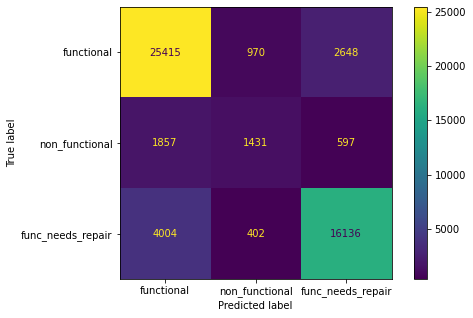

In [1031]:
print(classification_report(y_train, y_pred_oos))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_oos),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

In [1032]:
rf_preds = rf_clf.predict(x_valid)


              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3226
           1       0.51      0.36      0.42       432
           2       0.84      0.78      0.81      2282

    accuracy                           0.81      5940
   macro avg       0.72      0.68      0.69      5940
weighted avg       0.80      0.81      0.80      5940



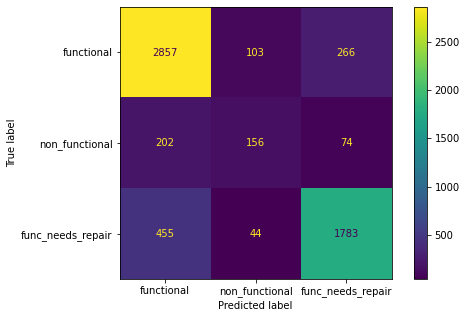

In [1033]:
print(classification_report(y_valid, rf_preds))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, rf_preds),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

####Feature Importance - Random Forest

In [1034]:
rf_feature_scores = pd.Series(rf_clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# feature_scores

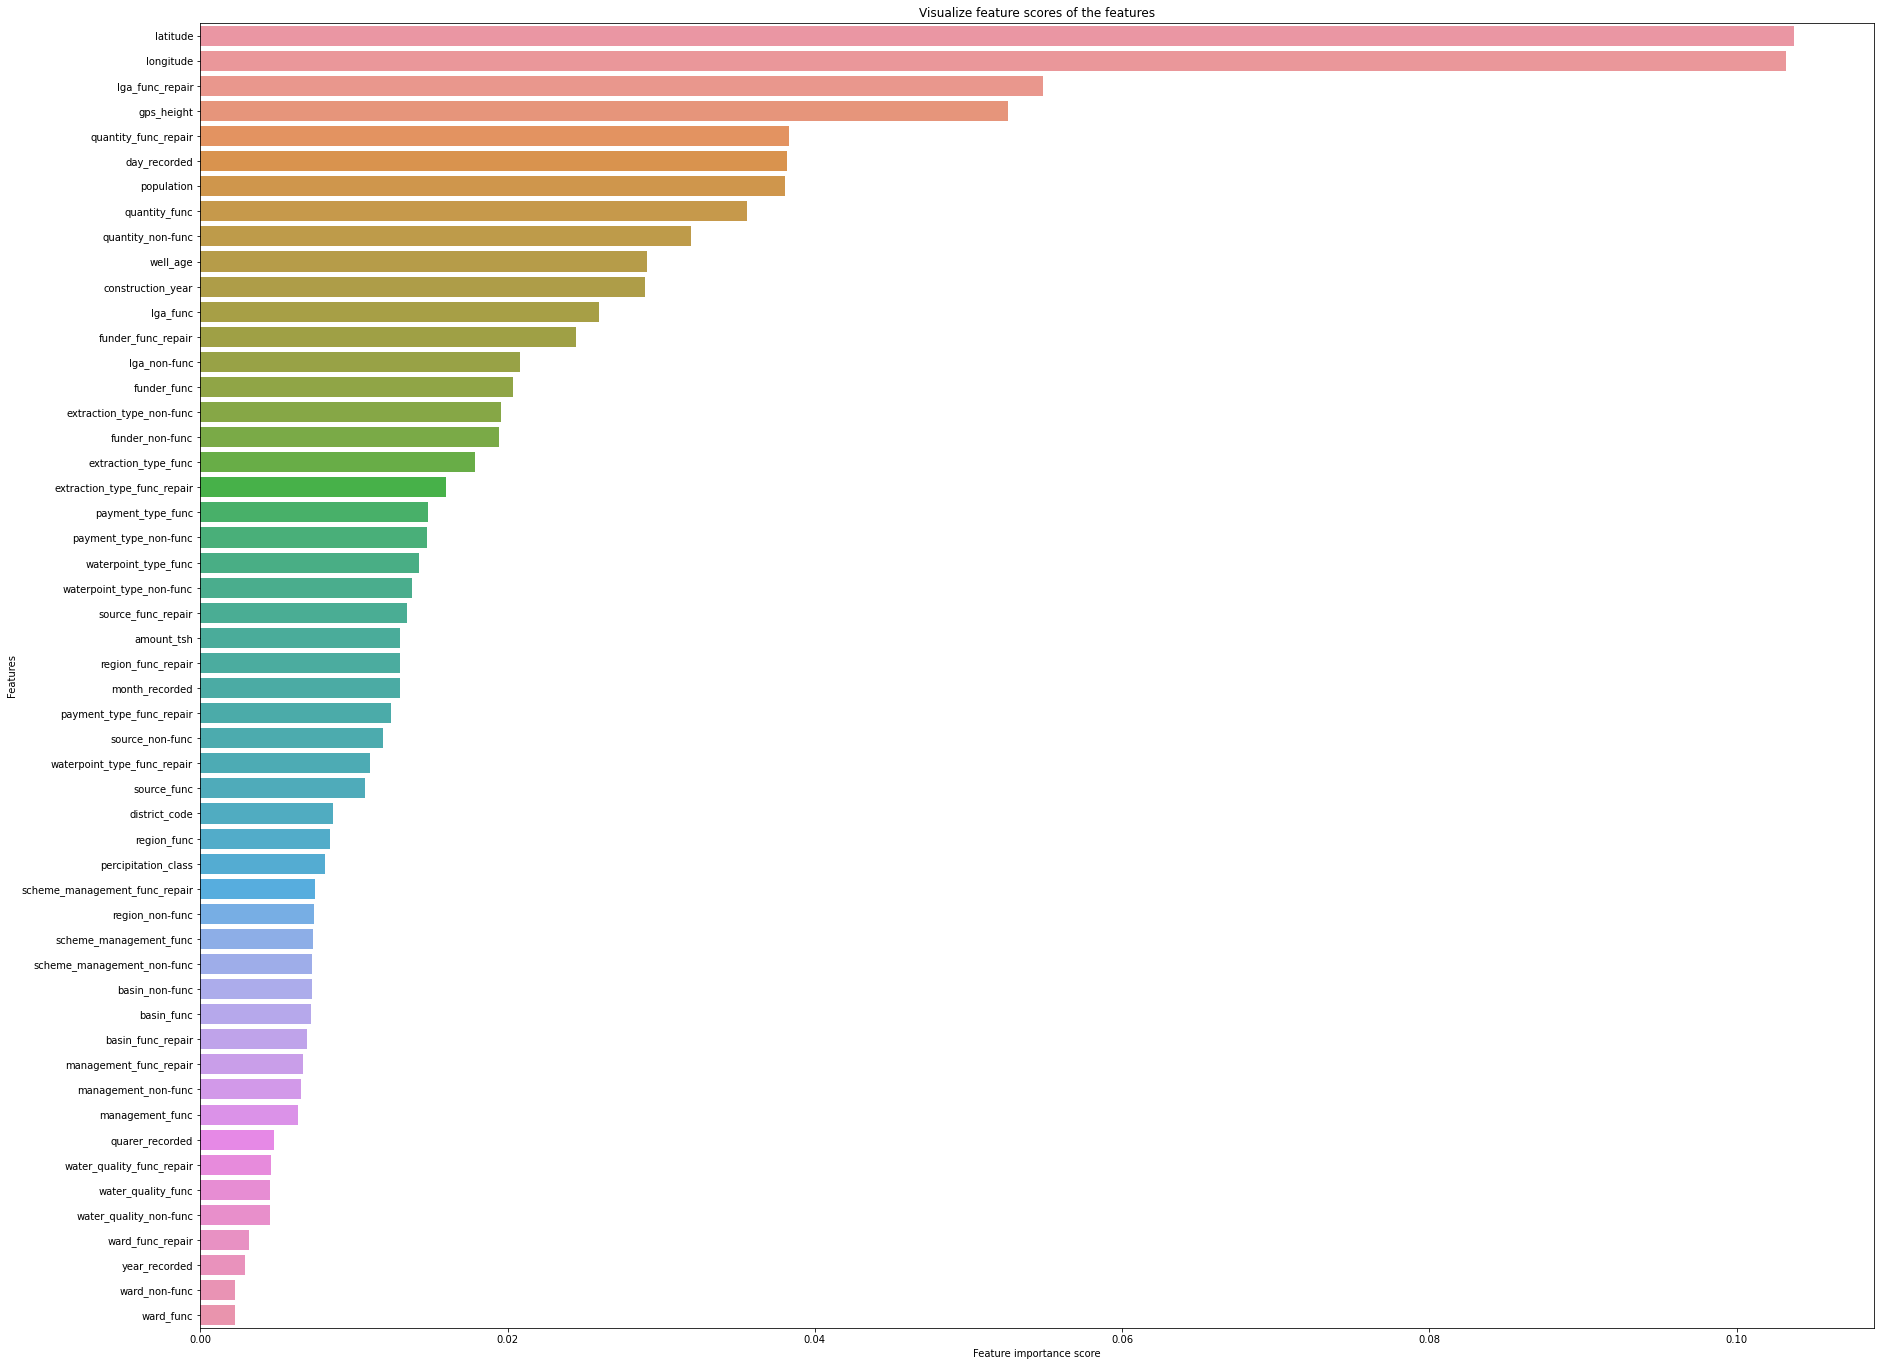

In [1035]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=rf_feature_scores, y=rf_feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(rf_feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [1037]:
rf_preds_test = rf_clf.predict(tar_test)

In [1038]:
test_RFoutput=fac_test
test_RFoutput['status_group'] = rf_preds_test

<ipython-input-1038-48ba4dec1e76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_RFoutput['status_group'] = rf_preds_test


In [1039]:
test_RFoutput.head()

,amount_tsh,funder,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,day_recorded,quarer_recorded,percipitation_class,well_age,status_group
0,20.0,163,1996.0,35.290799,-4.059696,4,2,3,37,573,321.0,0,9,1,2012.0,5,8,1,0,3,1,3,2013,2,0,1,2,23,2
1,30.0,20,1569.0,36.656709,-3.309214,2,16,2,26,367,300.0,0,0,1,2000.0,0,0,1,0,1,0,0,2013,2,0,1,2,13,0
2,50.0,25,1567.0,34.767863,-5.004344,4,18,2,32,647,500.0,0,0,2,2010.0,5,0,1,0,1,1,3,2013,2,4,1,2,1,0
3,50.0,144,267.0,38.058046,-9.418672,3,14,43,105,1795,250.0,1,0,1,1987.0,5,0,3,0,2,5,3,2013,1,1,1,4,8,2
4,500.0,1037,1260.0,35.006123,-10.950412,3,9,3,97,653,60.0,1,5,1,2000.0,0,4,6,0,0,0,0,2013,3,2,1,4,13,0


In [1040]:
test_RFoutput['id']=test_id

<ipython-input-1040-6afea9a59b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_RFoutput['id']=test_id


In [1041]:
#0 functional
#1 functional needs repair
#non functional
test_RFoutput['status_group'] = test_RFoutput['status_group'].map({ 0:'functional', 1:'functional needs repair', 2:'non functional'})

<ipython-input-1041-f27566d0a95c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_RFoutput['status_group'] = test_RFoutput['status_group'].map({ 0:'functional', 1:'functional needs repair', 2:'non functional'})


In [1042]:
test_RFoutput.head()

,amount_tsh,funder,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,day_recorded,quarer_recorded,percipitation_class,well_age,status_group,id
0,20.0,163,1996.0,35.290799,-4.059696,4,2,3,37,573,321.0,0,9,1,2012.0,5,8,1,0,3,1,3,2013,2,0,1,2,23,non functional,50785
1,30.0,20,1569.0,36.656709,-3.309214,2,16,2,26,367,300.0,0,0,1,2000.0,0,0,1,0,1,0,0,2013,2,0,1,2,13,functional,51630
2,50.0,25,1567.0,34.767863,-5.004344,4,18,2,32,647,500.0,0,0,2,2010.0,5,0,1,0,1,1,3,2013,2,4,1,2,1,functional,17168
3,50.0,144,267.0,38.058046,-9.418672,3,14,43,105,1795,250.0,1,0,1,1987.0,5,0,3,0,2,5,3,2013,1,1,1,4,8,non functional,45559
4,500.0,1037,1260.0,35.006123,-10.950412,3,9,3,97,653,60.0,1,5,1,2000.0,0,4,6,0,0,0,0,2013,3,2,1,4,13,functional,49871


In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)
test_RFoutput[[ 'id','status_group']].to_csv('/content/drive/My Drive/Colab Notebooks/RFoutput.csv', encoding='utf-8', index=False, header=True)

##4.0- LightGBM
https://techfor-today.com/lightgbm-using-python-hyperparameter-tuning-of-lightgbm/ 

boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs

In [1043]:
# importing the lightgbm module
import lightgbm as lgb
# initializing the model
LightGBM_Clf = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves = 50,
    max_depth=-1,
    learning_rate = 0.2,
    n_estimators=1000,
    subsample_for_bin=200000,
    objective=None,
    class_weight= None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    random_state=17, 
    n_jobs=-1, 
    silent=True, 
    importance_type='split',
    verbosity = 1,
    
)



In [ ]:
y_pred_oos = cross_val_predict(LightGBM_Clf, x_train, y_train, cv=stratifiedkf)
LightGBM_Clf.fit(x_train, y_train)
accuracy = metrics.accuracy_score(y_train, y_pred_oos)
print(f'Accuracy: {accuracy}')

In [ ]:
print(classification_report(y_train, y_pred_oos))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_oos),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
# making prediction 
LightGBM_pred = LightGBM_Clf.predict(x_valid)

In [ ]:
print(classification_report(y_valid, LightGBM_pred))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, LightGBM_pred),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
LightGBM_feature_scores = pd.Series(LightGBM_Clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# feature_scores

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=LightGBM_feature_scores, y=LightGBM_feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(LightGBM_feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

###4.0.1- Hyperparameter tuning of LightGBM

In [ ]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
    
    
    # validating the model based on the accurasy score
    r_square = cross_val_score(model, Input, Ouput, scoring='r2', cv=cv, n_jobs=-1)
    
#     returning the accuracy score
    return r_square

Finding the optimum number of iterations in LightGBM

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    decision_stump= [10, 50, 100, 500, 1000]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        models[str(i)] = lgb.LGBMRegressor(n_estimators=i)
    
#     returning the model
    return models

In [ ]:
# calling the build_models function
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    R_square = evaluate_model(model, x_train, y_train)
    
    
    # appending the accuray socres in results
    results.append(R_square)
    names.append(name)
    
    
    # printing the accuracy score
    print('Iterations (%s)---R-square( %.5f)' % (name, np.mean(R_square)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

Finding the optimum number of Features in LightGBM

In [ ]:
# creating the function 
def build_models():
    
#     creating dic of models
    models = dict()
    
    # explore features numbers from 1-5
    for i in range(1,6):
        
#         appending the models
        models[str(i)] = lgb.LGBMRegressor(max_features=i)
    
#     returining the models
    return models

In [ ]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('---->Features(%s)---R_square( %.5f)' % (name, mean(R_square)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

Finding the optimum sample size in LightGBM

In [ ]:
# creating the function
def build_models():
    
#     dic of models
    models = dict()
    
#     exploring different sample values
    for i in arange(0.1, 1.1, 0.1):
        
#         key value
        k = '%.1f' % i
    
#     appending the model
        models[k] = lgb.LGBMRegressor(subsample=i)
    return models

In [ ]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('Samples(%s)---R_square( %.5f)' % (name, mean(R_square)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

Finding the optimum learning rate in LightGBM

In [ ]:
# creating function
def build_models():
    
#     creating dic of models
    models = dict()
    
#     different learning rates
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        
#         key value
        k = '%.4f' % i
    
#     appending the models
        models[k] = lgb.LGBMRegressor(learning_rate=i)
    return models

In [ ]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('Learning Rate(%s)---R Square( %.5f)' % (name, mean(R_square)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

Finding the optimum depth of tree in LightGBM

In [ ]:
# building function for the model
def build_models():
    
#     creating dic of models
    models = dict()
    
#     specifying the depth of trees
    for i in range(1,12):
        
#         appending the models
        models[str(i)] = lgb.LGBMRegressor(max_depth=i)
        
#   returining the model
    return models

In [ ]:
# calling the function
models = build_models()
# creating lists 
results, names = list(), list()
# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    R_square = evaluate_model(model, Input, Output)
    
    # appending the results
    results.append(R_square)
    names.append(name)
    
#     printing the results
    print('Decision tree depth (%s)---R_square( %.5f)' % (name, mean(R_square)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

##4.4- eXtreme Gradient boosting
Main features:
* 1- Cross-validation at each iteration: Cross-validation is a process in which the model is tested using different portions of the dataset in each iteration. The XGBoost algorithm has an internal parameter for the cross-validation and it tests each of the weak learners using the cross-validation method.
* 2- Parallel process: XGBoost uses OpenMP for parallel processing. But unlike random forests which create trees in parallel, the XGBoost creates individual trees using a parallel process.
* 3- Regularization: In Machines, learning regularization is a technique that is commonly used to reduce the risk of overfitting. Overfitting is when the models learn too many specific patterns about the training dataset and fail to generalize on the testing dataset. So, the XGBoost uses different regularization techniques in order to make sure that the model is not overfitted and that the findings can be generalized to the testing dataset.
* 4- Missing values: One of the essential features of the XGBoost algorithm is that it can handle the missing values automatically. That means we don’t need to handle missing values in the preprocessing step.
* 5- Tree pruning: Tree pruning is the process of removing the nodes from the trees that do not contribute to the classification.

https://techfor-today.com/hyperparameter-tuning-of-xgboost-algorithm/#Finding_the_optimum_number_of_features_using_Hyperparameter_tuning_of_XGBoost

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

###4.3.1- Hyper Parameter Tuning for eXtreme Gradient Boosting - sequential Approach
1- Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.

2- Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.

3- Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.

4- Lower the learning rate and decide the optimal parameters.

https://kevinvecmanis.io/machine%20learning/hyperparameter%20tuning/dataviz/python/2019/05/11/XGBoost-Tuning-Visual-Guide.html

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

####4.3.1.1- Finding the optimum number of iterations, number of stumps

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    decision_stump= [100, 150, 200, 300, 400, 500, 600, 700]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        # models[str(i)] = XGBClassifier(n_estimators=i)

        models[str(i)] = XGBClassifier(max_depth = 8, # the larger the more prone to overfit, range 3-10
                            learning_rate = 0.1, # range [0,1], typically=0.01-0.2
                            n_estimators = i,#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            verbosity = 2,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            gamma = 0, 
                            # Minimum loss reduction required to split. range=[0,inf],
                            # The larger gamma is, the more conservative the algorithm will be.
                            min_child_weight = 0, # used to restrict overfitting
                            max_delta_step = 0,
                            subsample = 0.3,
                            colsample_bytree = 0.5,
                            colsample_bylevel = 0.5,
                            colsample_bynode = 0.5,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            scale_pos_weight = 0.5, #[default=1]
                            random_state = 17,
                            
) 
#     returning the model
    return models

In [ ]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=17)
    # validating the model based on the accurasy score
    accuracy = cross_val_score(model, Input, Ouput, scoring='accuracy', cv=cv, n_jobs=-1)  
    # returning the accuracy score
    return accuracy

In [ ]:
# calling the build_models function
models = {}
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    accuracy = evaluate_model(model, x_train, y_train)

    # appending the accuray socres in results
    results.append(accuracy)
    names.append(name)

    # printing -Hyperparameter tuning of XGBoost
    print('---->Iterations (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.3.1.3- Finding the optimum sample size

In [ ]:
# creating the function
def build_models():
    
#     dic of models
    models = dict()
    
#     exploring different sample values
    for i in np.arange(0.1, 1.1, 0.1):
        
#         key value
        k = '%.1f' % i
    
#     appending the model
        models[k] = XGBClassifier(max_depth = 8, # the larger the more prone to overfit, range 3-10
                            learning_rate = 0.1, # range [0,1], typically=0.01-0.2
                            n_estimators = 600,
                            verbosity = 2,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            gamma = 0, 
                            # Minimum loss reduction required to split. range=[0,inf],
                            # The larger gamma is, the more conservative the algorithm will be.
                            min_child_weight = 0, # used to restrict overfitting
                            max_delta_step = 0,
                            subsample = i, #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            colsample_bytree = 0.5,
                            colsample_bylevel = 0.5,
                            colsample_bynode = 0.5,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            scale_pos_weight = 0.5, #[default=1]
                            random_state = 17,
        )
    return models

In [ ]:
# calling the function
models = {}
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():

    # calling the evaluting function
    accuracy = evaluate_model(model, x_train, y_train)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing - Hyperparameter tuning of XGBoost
    print('Samples(%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.3.1.4- Finding optimum learning rate 

In [ ]:
# creating function
def build_models():
    
#     creating dic of models
    models = dict()
    
#     different learning rates
    for i in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
        
#         key value
        k = '%.4f' % i
    
#     appending the models
        models[k] = XGBClassifier(max_depth = 8, # the larger the more prone to overfit, range 3-10
                            learning_rate = i, # range [0,1], typically=0.01-0.2 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            n_estimators = 600,
                            verbosity = 2,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            gamma = 0, 
                            # Minimum loss reduction required to split. range=[0,inf],
                            # The larger gamma is, the more conservative the algorithm will be.
                            min_child_weight = 0, # used to restrict overfitting
                            max_delta_step = 0,
                            subsample = 0.6, 
                            colsample_bytree = 0.5,
                            colsample_bylevel = 0.5,
                            colsample_bynode = 0.5,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            scale_pos_weight = 0.5, #[default=1]
                            random_state = 17,
        )
    return models

In [ ]:
# calling the function
models ={}
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, x_train, y_train)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing - Hyperparameter tuning of XGBoost
    print('Learning Rate(%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

####4.3.1.5- Finding the optimum depth 

In [ ]:
# building function for the model
def build_models():
    
#     creating dic of models
    models = dict()
    
#     specifying the depth of trees
    for i in range(1,13):
        
#         appending the models
        models[str(i)] = XGBClassifier(max_depth = i, # the larger the more prone to overfit, range 3-10 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            learning_rate = 0.1, # range [0,1], typically=0.01-0.2 
                            n_estimators = 600,
                            verbosity = 2,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            gamma = 0, 
                            # Minimum loss reduction required to split. range=[0,inf],
                            # The larger gamma is, the more conservative the algorithm will be.
                            min_child_weight = 0, # used to restrict overfitting
                            max_delta_step = 0,
                            subsample = 0.6, 
                            colsample_bytree = 0.5,
                            colsample_bylevel = 0.5,
                            colsample_bynode = 0.5,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            scale_pos_weight = 0.5, #[default=1]
                            random_state = 17,
        )
        
#   returining the model
    return models

In [ ]:
# calling the function
models = {}
models = build_models()

# creating lists 
results, names = list(), list()

# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model, x_train, y_train)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
#     printing - Hyperparameter tuning of XGBoost
    print('Decision tree depth (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

####4.3.1.6- Finding the optimum colsample_bytree

In [ ]:
# building function for the model
def build_models():
    
#     creating dic of models
    models = dict()
    
#     specifying the depth of trees
    for i in np.arange(0, 1.1, 0.1):
        
#         appending the models
        models[str(i)] = XGBClassifier(max_depth = 7, # the larger the more prone to overfit, range 3-10 
                            learning_rate = 0.1, # range [0,1], typically=0.01-0.2 
                            n_estimators = 600,
                            verbosity = 2,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            gamma = 0, 
                            # Minimum loss reduction required to split. range=[0,inf],
                            # The larger gamma is, the more conservative the algorithm will be.
                            min_child_weight = 0, # used to restrict overfitting
                            max_delta_step = 0,
                            subsample = 0.6, 
                            colsample_bytree = i, #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            colsample_bylevel = i,
                            colsample_bynode = i,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            scale_pos_weight = 0.5, #[default=1]
                            random_state = 17,
        )
        
#   returining the model
    return models

In [ ]:
# calling the function
models = {}
models = build_models()

# creating lists 
results, names = list(), list()

# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model, x_train, y_train)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
#     printing - Hyperparameter tuning of XGBoost
    print('Portion of Features Selected - colsample_by (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

####4.3.1.7- Finding the optimum scale_pos_weight

In [ ]:
# building function for the model
def build_models():
    
#     creating dic of models
    models = dict()
    
#     specifying the depth of trees
    for i in np.arange(0.1, 1.1, 0.1):
        
#         appending the models
        models[str(i)] = XGBClassifier(max_depth = 7, # the larger the more prone to overfit, range 3-10 
                            learning_rate = 0.1, # range [0,1], typically=0.01-0.2 
                            n_estimators = 600,
                            verbosity = 2,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            gamma = 0, 
                            # Minimum loss reduction required to split. range=[0,inf],
                            # The larger gamma is, the more conservative the algorithm will be.
                            min_child_weight = 1, # used to restrict overfitting
                            max_delta_step = 0,
                            subsample = 0.6, 
                            colsample_bytree = 0.5, 
                            colsample_bylevel = 0.5,
                            colsample_bynode = 0.5,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            scale_pos_weight = i, #[default=1] #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Iterating Through
                            random_state = 17,
        )
        
#   returining the model
    return models

In [ ]:
# calling the function
models = {}
models = build_models()

# creating lists 
results, names = list(), list()

# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model, x_train, y_train)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
#     printing - Hyperparameter tuning of XGBoost
    print('scale_pos_weight - colsample_by (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

###4.3.2- RandomizedSearchCV for Hyperparameter tuning of XGBoost

In [ ]:
# defiing the model
model = XGBClassifier( 
                            verbosity = 2,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            colsample_bytree = 0.5, 
                            colsample_bylevel = 0.5,
                            colsample_bynode = 0.5,
                            scale_pos_weight = 0.6, #[default=1] 
                            random_state = 17,)


# creating a dict of grids
grid = dict()

# values for iteration
grid['n_estimators'] = np.arange(400,900)

# values for learning rate
grid['learning_rate'] = [0.08, 0.09, 0.1]

# values for the sample
grid['subsample'] = np.arange(0.3, 0.81, 0.025)

# values for teh depth of tree
grid['max_depth'] = [4, 5, 6, 7, 8, 9, 10]

In [ ]:
# defining the cv
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1)


# applying the gridsearchcv method
Rand_search = RandomizedSearchCV(estimator = model
                                 , param_distributions=grid
                                 , n_iter=10
                                 , scoring='accuracy'
                                 , n_jobs=-1
                                 , cv = 2 # None, to use the default 5-fold cross validation, integer, to specify the number of folds in a (Stratified)KFold
                                #  , verbose = 1
                                 , random_state=17)

# storing the values
Rand_result = Rand_search.fit(x_train, y_train)


# printing the best parameters - Hyperparameter tuning of XGBoost
print("Accuracy score: %f using %s" % (Rand_result.best_score_, Rand_result.best_params_))

###4.3.3 Fitting the Optimum Model

In [ ]:
xgboost_clf = XGBClassifier(max_depth = 8, # the larger the more prone to overfit, range 3-10
                            learning_rate = 0.09, # range [0,1], typically=0.01-0.2
                            n_estimators = 533,
                            verbosity = 1,
                            objective = "multi:softmax",
                            booster = "gbtree", # gblinear or dart
                            n_jobs = 1,
                            gamma = 0, 
                            # Minimum loss reduction required to split. range=[0,inf],
                            # The larger gamma is, the more conservative the algorithm will be.
                            min_child_weight = 1, # used to restrict overfitting
                            max_delta_step = 0,
                            subsample = 0.75,
                            colsample_bytree = 0.5,
                            colsample_bylevel = 0.5,
                            colsample_bynode = 0.5,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            scale_pos_weight = 0.5, #[default=1]
                            random_state = 17,
                            
)

In [ ]:
y_pred_oos = cross_val_predict(xgboost_clf, x_train, y_train, cv=stratifiedkf)
xgboost_clf.fit(x_train, y_train)
accuracy = metrics.accuracy_score(y_train, y_pred_oos)
print(f'Accuracy: {accuracy}')

In [ ]:
print(classification_report(y_train, y_pred_oos))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_oos),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
xgboost_preds = xgboost_clf.predict(x_valid)

In [ ]:
print(classification_report(y_valid, xgboost_preds))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, xgboost_preds),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
xgboost_feature_scores = pd.Series(xgboost_clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# xgboost_feature_scores

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=xgboost_feature_scores, y=xgboost_feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(xgboost_feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
test=test.drop(['status_group', 'id'], axis=1)

In [ ]:
xgboost_preds_test = xgboost_clf.predict(test)

In [ ]:
test_XGBoutput=test
test_XGBoutput['status_group'] = xgboost_preds_test

In [ ]:
test_XGBoutput['id']=test_id

In [ ]:
test_XGBoutput['status_group'] = test_XGBoutput['status_group'].map({ 0:'functional', 1:'functional needs repair', 2:'non functional'})

In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)
test_XGBoutput[[ 'id','status_group']].to_csv('/content/drive/My Drive/Colab Notebooks/XGBoutput.csv', encoding='utf-8', index=False, header=True)

##4.3- Gradient Boosting
Gradient Tree Boosting, Stochastic Gradient Boosting, and GBM are other names for the Gradient Boosting Algorithm. It creates a sequence of weak models ( usually decision trees) and comes up with a final strong learner. Each prediction in gradient boosting aims to outperform the one before it by lowering the errors. Gradient Boosting’s key principle is that it fits a new predictor to the residual errors created by the preceding predictor rather than fitting a prediction to the data at each iteration.

https://techfor-today.com/gradient-boosting-algorithm-using-python/



###4.3.1- Hyper Parameter Tuning for Gradient Boosting

GradientBoostingClassifier(*, loss: str = "deviance", learning_rate: float = 0.1, n_estimators: int = 100, subsample: float = 1, criterion: str = "friedman_mse", min_samples_split: int = 2, min_samples_leaf: int = 1, min_weight_fraction_leaf: float = 0, max_depth: int = 3, min_impurity_decrease: float = 0, init: Any | None = None, random_state: Any | None = None, max_features: Any | None = None, verbose: int = 0, max_leaf_nodes: Any | None = None, warm_start: bool = False, validation_fraction: float = 0.1, n_iter_no_change: Any | None = None, tol: float = 0.0001, ccp_alpha: float = 0)

####4.3.1.1- Finding the optimum number of trees in Gradient boosting

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    GB_models = dict()
    
    # number of decision stumps
    decision_stump= [150, 200, 250, 300]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        GB_models[str(i)] = GradientBoostingClassifier(n_estimators=i)
    
#     returning the model
    return GB_models

In [ ]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    
    
    # validating the model based on the accurasy score
    accuracy = cross_val_score(model, Input, Ouput, scoring='accuracy', cv=cv, n_jobs=-1)
    
#     returning the accuracy score
    return accuracy

In [ ]:
# calling the build_models function
models = {}
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    scores = evaluate_model(model, x_train, y_train)
    
    
    # appending the accuray socres in results
    results.append(scores)
    names.append(name)
    
    
    # printing - Gradient boosting algorithm using Python
    print('---->Iterations (%s)---Accuracy( %.5f)' % (name, np.mean(scores)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.3.1.2- Finding the optimum depth of trees in the Gradient boosting algorithm using Python

In [ ]:
# building function for the model
def build_models():
    
#     creating dic of models
    GB_models = dict()
    
#     specifying the depth of trees
    for i in range(1,7):
        
#         appending the models
        GB_models[str(i)] = GradientBoostingClassifier(max_depth=i)
        
#   returining the model
    return GB_models

In [ ]:
# calling the function
models = build_models()
# creating lists 
results, names = list(), list()
# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model, x_train, y_train)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
#     printing - Gradient boosting algorithm using Python
    print('---->Decision tree depth (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.3.1.3- Finding an optimum Learning rate in Gradient boosting algorithm using Python

In [ ]:
# creating function
def build_models():
    
#     creating dic of models
    GB_models = dict()
    
#     different learning rates
    for i in [0.05, 0.1, 0.2, 0.5, 1.0, 1.5]:
        
#         key value
        k = '%.4f' % i
    
#     appending the models
        GB_models[k] = GradientBoostingClassifier(learning_rate=i)
    return GB_models

In [ ]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, x_train, y_train)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing learning rate of Gradient boosting algorithm using Python
    print('---->Learning Rate(%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.3.1.4- Finding an optimum number of features in the Gradient boosting algorithm using Python
Each decision tree can have a different amount of attributes that are utilized to suit it. Similar to modifying the sample size, changing the number of features gives more variance to the model, which may enhance performance.

In [ ]:
# creating the function 
def build_models():
    
#     creating dic of models
    GB_models = dict()
    
    # explore features numbers from 1-4
    for i in range(1,5):
        
#         appending the models
        GB_models[str(i)] = GradientBoostingClassifier(max_features=i)
    
#     returining the models
    return GB_models

In [ ]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, x_train, y_train)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing features of Gradient boosting algorithm using Python
    print('---->Features(%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.3.1.4- Finding the optimum number of samples in the Gradient boosting algorithm using Python
You can change how many samples were used to fit each tree. This indicates that a randomly chosen portion of the training dataset is used to fit each tree. Using fewer samples introduces more variance for each tree, although it can improve the overall performance of the model. Let us now create a function that returns multiple models with different sample values.

In [ ]:
# creating the function
def build_models():
    
#     dic of models
    GB_models = dict()
    
#     exploring different sample values
    for i in np.arange(0.1, 1.1, 0.1):
        
#         key value
        k = '%.1f' % i
    
#     appending the model
        GB_models[k] = GradientBoostingClassifier(subsample=i)
    return GB_models

In [ ]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, x_train, y_train)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing sampes for Gradient boosting algorithm using Python
    print('---->Samples(%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

###4.3.2- GridSearchCV for Gradient boosting algorithm using Python

In [ ]:
# defiing the model
model = GradientBoostingClassifier()
# creating a dict of grids
grid = dict()
# values for iteration
grid['n_estimators'] = [10, 50, 100, 500]
# values for learning rate
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# values for the sampel
grid['subsample'] = [0.5, 0.7, 1.0]
# values for teh depth of tree
grid['max_depth'] = [3, 4, 5]

In [ ]:
# defining the cv
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# applying the gridsearchcv method
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# storing the values
grid_result = grid_search.fit(x_train, y_train)
# printing the best parameters of Gradient boosting algorithm using Python
print("Accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

###4.3.3- Fitting the Optimum Mode

##4.4- ADABoostClassifier
The training algorithm involves starting with one decision tree, finding those examples in the training dataset that were misclassified, and adding more weight to those examples. Another tree is trained on the same data, although now weighted by the misclassification errors. This process is repeated until a desired number of trees are added.

https://machinelearningmastery.com/adaboost-ensemble-in-python/

https://www.datacamp.com/tutorial/adaboost-classifier-python#adaboost-classifier

https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f

https://vitalflux.com/differences-between-random-forest-vs-adaboost/

https://vitalflux.com/adaboost-algorithm-explained-with-python-example/#:~:text=Base%20estimators%20for%20Adaboost%20algorithm,in%20classifier%20with%20high%20variance.

https://techfor-today.com/hyperparameter-tuning-of-adaboost/

###4.4.1- Hyper Parameter Tuning for AdaBoosting - Sequential Approach

####4.4.1.1- The optimum number of trees in Adaboost
Create a function that will build various Ada boost models. And for the model, we will specify a different number of decision stumps starting from 50 to 1000.

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    Ada_models = dict()
    
    # number of decision stumps
    decision_stump= [10, 50, 100, 500]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        models[str(i)] = AdaBoostClassifier(n_estimators=i, random_state=7)
    return models

The next step is to build a function for the validation of the models. In this case, we will use the cross-validation method. Let us build the function which returns the accuracy score of the models.

In [ ]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    
    
    # validating the model based on the accurasy score
    accuracy = cross_val_score(model, Input, Ouput, scoring='accuracy', cv=cv, n_jobs=-1, random_state=7)
    
#      accuracy score- hyperparameter tuning of Adaboost
    return accuracy

Now, we will call the above functions which will create the models and will evaluate them based on the accuracy score.

In [ ]:
# calling the build_models function
models = {}
models = build_models()

# creating list
results, names = list(), list()

# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    scores = evaluate_model(model, x_train, y_train)
    
    
    # appending the accuray socres in results
    results.append(scores)
    names.append(name)
    
    
    # printing results of hyperparameter tuning of Adaboost
    print('---->Stump tree (%s)---Accuracy( %.5f)' % (name, np.mean(scores)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.4.1.2- Tunning the weak learner in Ada boost - max_depth
A decision tree with one level is used as a weak learner by default in the Ada boost. We can increase the depth of the stump tree to get the optimum depth tree.

In [ ]:
# building function for the model
def build_models():
    
#     creating dic of models
    models = dict()
    
#     specifying the depth of trees
    for i in range(1,8):
        
        # model
        base_model = DecisionTreeClassifier(max_depth=i, random_state=7)
        
        # creating dic of modles
        models[str(i)] = AdaBoostClassifier(base_estimator=base_model, random_state=7)
        
#   returining the model -results of hyperparameter tuning of Adaboost
    return models

In this section, we will not again build the evaluation function, as we have already created in the above section. So, we can use it here as well.

In [ ]:
# calling the function
models={}
models = build_models()
# creating lists 
results, names = list(), list()
# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model, x_train, y_train)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
#     printing results of hyperparameter tuning of Adaboost
    print('---->Stump tree (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

####4.4.1.3- Tuning learning rate in Ada boost
Learning rate is simply the step size of each iteration. The default value of the learning rate in the Ada boost is 1. We will now use the hyperparameter tuning method to find the optimum learning rate for our model.

In [ ]:
# building the models
def build_models():
    
#     creating the model dic
    models = dict()
    
    
    # learning rate for various values
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        
#         models in dic
        models[key] = AdaBoostClassifier(learning_rate=i, random_state=7)
    
#     returning models -results of hyperparameter tuning of Adaboost
    return models

In [ ]:
# calling the function
models={}
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, x_train, y_train)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing results of hyperparameter tuning of Adaboost
    print('---->Stump tree (%s)---Accuracy( %.5f)' % (name, np.mean(accuracy)))

In [ ]:
# fixing the size
plt.figure(figsize=(10, 8))
# plotting the values
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

###4.4.2- RandomizedSearchCV for Hyperparameter tuning of AdaBoosting
In the second aproach, we will use the RandomizedSearchCV method to find the optimum values for the parameters of the Ada boost algorithm using the same dataset. 

In [ ]:
# defiing the model
dtree = DecisionTreeClassifier(random_state=17)

grid_dtree= dict()

# values for iteration
grid_dtree['criterion'] = ['gini', 'entropy']

# values for iteration
grid_dtree['max_depth'] = np.arange(1,11)

In [ ]:
# defining the cv
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1)


# applying the gridsearchcv method
Rand_search = RandomizedSearchCV(estimator = dtree
                                 , param_distributions=grid_dtree
                                 , n_iter=10
                                 , scoring='accuracy'
                                 , n_jobs=-1
                                 , cv = None # None, to use the default 5-fold cross validation, integer, to specify the number of folds in a (Stratified)KFold
                                 , verbose = 1
                                 , random_state=17)

# storing the values
Rand_result = Rand_search.fit(x_train, y_train)


# printing the best parameters - Hyperparameter tuning of XGBoost
print("Accuracy score: %f using %s" % (Rand_result.best_score_, Rand_result.best_params_))

In [ ]:
# defiing the model
dtree = DecisionTreeClassifier(max_depth = 9 , criterion = 'gini', random_state=17)

ada_model = AdaBoostClassifier( base_estimator = dtree,
                            algorithm='SAMME.R',
                            random_state = 17,)


# creating a dict of grids
grid = dict()

# values for iteration
grid['n_estimators'] = np.arange(400,900)

# values for learning rate
grid['learning_rate'] = np.arange(0.8,1.2, 0.05)


In [ ]:
# defining the cv
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1)


# applying the gridsearchcv method
Rand_search = RandomizedSearchCV(estimator = ada_model
                                 , param_distributions=grid
                                 , n_iter=10
                                 , scoring='accuracy'
                                 , n_jobs=-1
                                 , cv = 2 # None, to use the default 5-fold cross validation, integer, to specify the number of folds in a (Stratified)KFold
                                 , verbose = 1
                                 , random_state=17)

# storing the values
Rand_result = Rand_search.fit(x_train, y_train)


# printing the best parameters - Hyperparameter tuning of XGBoost
print("Accuracy score: %f using %s" % (Rand_result.best_score_, Rand_result.best_params_))

###4.4.3- Fitting the Optimum Model

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=9, random_state=17)

In [ ]:
AdaBoost_clf = AdaBoostClassifier(base_estimator=dtree,
                                  n_estimators= 543,
                                  learning_rate=0.9,
                                  algorithm='SAMME.R',
                                  random_state=7)

In [ ]:
AdaBoost_model = AdaBoost_clf.fit(x_train, y_train)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)

In [ ]:
n_scores = cross_val_score(AdaBoost_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
AdaBoost_pred = AdaBoost_model.predict(x_valid)

In [ ]:
print(classification_report(y_valid, AdaBoost_pred))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, AdaBoost_pred),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
adaboost_feature_scores = pd.Series(AdaBoost_clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# adaboost_feature_scores

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=adaboost_feature_scores, y=adaboost_feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(adaboost_feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

##4.1- Logistic regression

####Fit the Logistic regression model and Tune Hyperparameter

In [ ]:
lr_sgd = SGDClassifier(
    loss = 'log',
    penalty = 'elasticnet',
    n_jobs = -1,
    random_state = 42,
    class_weight = 'balanced'
)

lr_sgd.fit(x_train, y_train)

* Hyperparameter Tuning

In [ ]:
params = {
    'alpha' : [0.001, 0.01, 0.1, 1.0, 10]
}
lr_hyperparam = GridSearchCV(lr_sgd, params, scoring='f1', cv=3, n_jobs = -1, verbose = 5, return_train_score = True)
lr_hyperparam.fit(x_train, y_train)

In [ ]:
lr_hyperparam.best_params_

In [ ]:
lr_full = SGDClassifier(
    alpha = 0.001,
    loss = 'log',
    penalty = 'elasticnet',
    n_jobs = -1,
    random_state = 42,
    class_weight = 'balanced'
)

lr_full.fit(x_train, y_train)

####Perform Prediction and Display Results for Logistic regression




In [ ]:
lr_preds = lr_full.predict(x_valid)

In [ ]:
print(classification_report(y_valid, lr_preds))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, lr_preds),
    display_labels=["functional", "non_functional", "func_needs_repair"],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
lr_table = PrettyTable()
lr_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  # 'Log-loss'
                 ]

lr_table.add_row([
    'Logistic Regression',
    accuracy_score(y_true = y_valid, y_pred = lr_preds),
    f1_score(y_true = y_valid, y_pred = lr_preds, average='weighted'),
    precision_score(y_true = y_valid, y_pred = lr_preds, average='weighted'),
    recall_score(y_true = y_valid, y_pred = lr_preds, average='weighted'),
    # log_loss(y_true = y_valid, y_pred = lr_preds)
])
print(lr_table)

####Feature Importances - Logistic Regression

In [ ]:
pretty_importances_plot(
    np.abs(lr_full.coef_[0]), 
    [i for i in range(x_train.shape[1])],
    xlabel = 'Importance',
    ylabel = 'Feature',
    horizontal_label = 'Feature importance in Logistic Regression'
)